<a href="https://colab.research.google.com/github/navinkumar357/Deep-learning-with-TensorFlow-Keras/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.3.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Exploring the dataset**

In [8]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_images)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

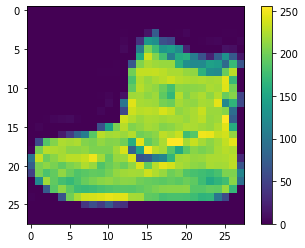

In [14]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [16]:
#preprocess images
train_images=train_images / 255.0
test_images=test_images / 255.0

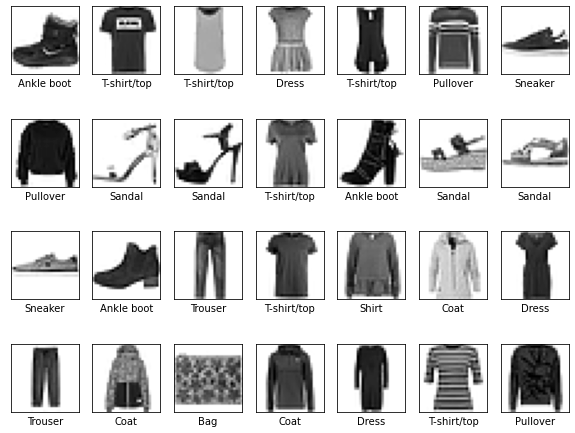

In [23]:
plt.figure(figsize=(10,10))
for i in range(28):
  plt.subplot(5,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
def create_model():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')])
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [27]:
model = create_model()
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0717 - accuracy: 0.6642
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6332 - accuracy: 0.7720
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5597 - accuracy: 0.7982
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5185 - accuracy: 0.8154
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4907 - accuracy: 0.8262
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4713 - accuracy: 0.8341
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4560 - accuracy: 0.8394
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4439 - accuracy: 0.8440
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4339 - accuracy: 0.8470
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.425

In [28]:
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([4.2318632e-07, 1.2341890e-07, 7.6472288e-06, 7.9082838e-06,
       1.2730823e-05, 1.5830733e-01, 1.0951728e-05, 2.8942615e-01,
       7.0642740e-03, 5.4516250e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [42]:
np.argmax(predictions[1583])

7

In [44]:
test_labels[1583]

7

In [67]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'white'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color) 
 
def plot_value_array(i, predictions_array, true_label):
   predictions_array, true_label = predictions_array[i], true_label[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   thisplot = plt.bar(range(10), predictions_array, color = "#777777")
   plt.ylim([0, 1])
   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('green')

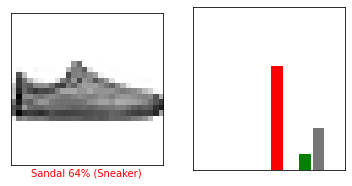

In [68]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

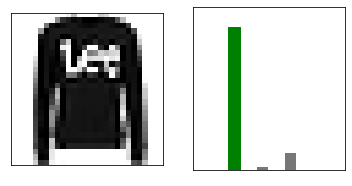

In [69]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

**Plot several images from the dataset with predictions**

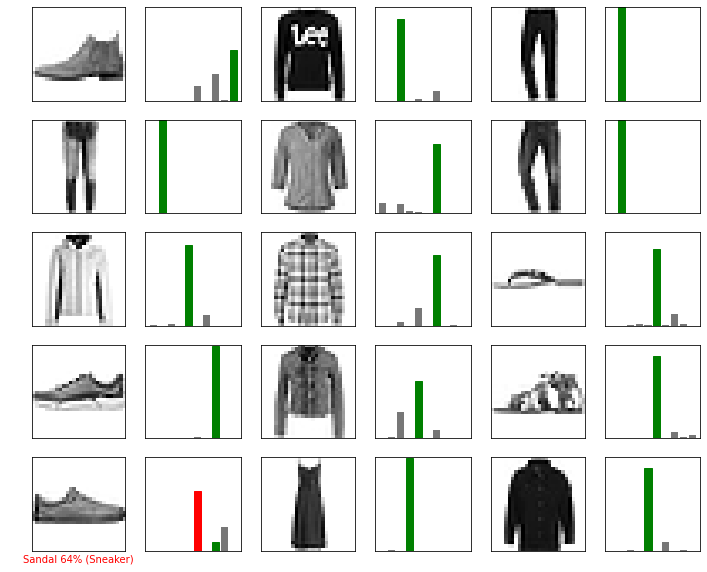

In [70]:
rows = 5
cols = 3
numi = rows*cols
plt.figure(figsize=(2*2*cols, 2*rows))
for i in range(numi):
  plt.subplot(rows, 2*cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(rows, 2*cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()